In [1]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
plt.style.use('seaborn')

plotColors = (list(mcolors.TABLEAU_COLORS)+list(mcolors.TABLEAU_COLORS)+list(mcolors.TABLEAU_COLORS))[:23]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
path = '/content/drive/My Drive/Colab Notebooks/PA_1/Guava_tree/guava_dataset.xlsx'
dataset = pd.read_excel(path, sheet_name='weather', header = [0, 1])

In [3]:
columns_names  =['Date','Temp_H','Temp_avg','Temp_L','Dew_H','Dew_avg','Dew_L','Humidity_H',
                 'Humidity_avg','Humidity_L','Pressure_H','Pressure_avg','Pressure_L',
                 'Visibility_H','Visibility_avg','Visibility_L','Wind_H','Wind_avg',
                 'Gust_Speed_H','Precip_sum','Events']
dataset.columns = columns_names

In [ ]:
#dataset.head(4)

In [4]:
dataset = dataset.drop(365, axis=0) # drop the row that states that year 2015 has begun
dataset = dataset.drop(['Gust_Speed_H'], axis = 1)
dataset = dataset.drop(['Precip_sum'], axis = 1)


In [5]:
month_list = ["1 Jan.","1 Feb.","1 Nov.","1 Aug.","1 Oct.","1 Dec.","1 Sep."]
dataset.Date.replace(to_replace = month_list ,value = 1,inplace = True )

arbitrary_values = [43952,43983,44013,43891,43922]
dataset.Date.replace(to_replace = arbitrary_values ,value= 1,inplace=True )

In [6]:
def month_fn(count ):
  count = count
  const_28 = 28
  const_30 = 30
  const_31 = 31
  dataset.loc[count:count+const_31,'Month'] = 1
  count = count+const_31
  dataset.loc[count+1:count+const_28,'Month'] = 2
  count = count+const_28
  dataset.loc[count+1:count+const_31,'Month'] = 3
  count = count+const_31
  dataset.loc[count+1:count+const_30,'Month'] = 4
  count = count+const_30
  dataset.loc[count+1:count+const_31,'Month'] = 5
  count = count+const_31
  dataset.loc[count+1:count+const_30,'Month'] = 6
  count = count+const_30
  dataset.loc[count+1:count+const_31,'Month'] = 7
  count = count+const_31
  dataset.loc[count+1:count+const_31,'Month'] = 8
  count = count+const_31
  dataset.loc[count+1:count+const_30,'Month'] = 9
  count = count+const_30
  dataset.loc[count+1:count+const_31,'Month'] = 10
  count = count+const_31
  dataset.loc[count+1:count+const_30,'Month'] = 11
  count = count+const_30
  dataset.loc[count+1:count+const_31,'Month'] = 12

In [7]:
month_fn(0)
month_fn(365)

In [8]:
dataset = dataset.drop(['Date'], axis = 1)

In [9]:
dataset['Events']= dataset['Events'].replace(np.nan, 'neutral')
dataset['Events']= dataset['Events'].replace('Fog', 'fog')
dataset['Events']= dataset['Events'].replace('Rain', 'rain')

In [10]:
one_hot = pd.get_dummies(dataset['Events'])
# Drop column B as it is now encoded
dataset = dataset.drop('Events',axis = 1)
# Join the encoded df
dataset = dataset.join(one_hot)

In [11]:
dataset = dataset.drop(['neutral'], axis = 1)

In [12]:
#dataset.info()

In [13]:
path = '/content/drive/My Drive/Colab Notebooks/PA_1/Guava_tree/guava_dataset.xlsx'
output = pd.read_excel(path,sheet_name='population', header = [1,2])

In [14]:
#output.head()

In [15]:
cols = output.columns.to_list()
cols = [','.join(y).replace(' ', '')  for y in cols] 

In [16]:
output.columns = cols

In [17]:
#output.info()

In [18]:
output = output.drop(26, axis=0) # drop the row that states that year 2015 has begun
output = output.drop(53, axis=0) # drop the row that states that year 2015 has begun


In [19]:
#output.head(52)

In [20]:
output.drop(['Date,Unnamed:0_level_1'], axis = 1,inplace= True)

In [21]:
columns_names  =['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
output.columns = columns_names

In [22]:
#output.shape

In [ ]:
plt.subplot(1, 2, 1)

plt.hist(output['1'])
plt.subplot(1, 2, 2)

plt.hist(output['2'])



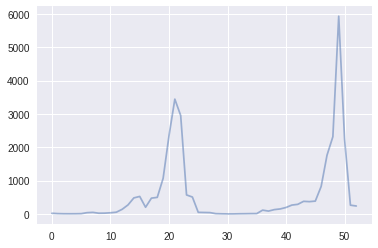

In [ ]:

plt.figure();

output['1'].plot(alpha=0.5)

In [ ]:
output

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#output.columns

In [24]:
def insert_rows_(df,count_of_rows,start_index):
  df1 = df[0:start_index]
  df2 = df[start_index:]
  dicts = [{'1':np.nan,
            '2':np.nan,
            '3':np.nan,
            '4':np.nan,
            '5':np.nan, '6':np.nan,
            '7':np.nan, '8':np.nan,
            '9':np.nan,
            '10':np.nan,
            '11':np.nan, '12':np.nan,
            '13':np.nan, '14':np.nan,
            '15':np.nan}]
  for i in range(start_index,count_of_rows):
    df1 = df1.append(dicts, ignore_index=False, sort=False)
    i+1
  df_result = pd.concat([df1, df2])
  #df_result.sort_index(ascending=True)
  return df_result


In [ ]:
'''
def insert_rows_(df,count_of_rows,start_index):
  df1 = df[0:start_index]
  df2 = df[start_index:]
  dicts = [{'mealybugspecies,Ferrisiavirgata':np.nan,
            'mealybugspecies,Iceryaseychellarum':np.nan,
            'mealybugspecies,Iceryapurchasi':np.nan,
            'mealybugspecies,planococcuscitri':np.nan,
            'Predators,Scymnussyriacus':np.nan, 'Predators,Cydoniavicina':np.nan,
            'Predators,Chrysoperlacarnea':np.nan, 'Predators,Rodalia':np.nan,
            'Parasitoidattackpredators,Homalotylusvicinus':np.nan,
            'Parasitoidattackpredators,Homalotyloidea':np.nan,
            'Primaryparasitoids,Leptomastix':np.nan, 'Primaryparasitoids,Leptomastidae':np.nan,
            'Primaryparasitoids,Gyranusoideaindica':np.nan, 'Primaryparasitoids,Aenasius':np.nan,
            'Hyperparasitoid,Chartocerussubaeneus':np.nan}]
  for i in range(start_index,count_of_rows):
    df1 = df1.append(dicts, ignore_index=False, sort=False)
    i+1
  df_result = pd.concat([df1, df2])
  #df_result.sort_index(ascending=True)
  return df_result
'''

"\ndef insert_rows_(df,count_of_rows,start_index):\n  df1 = df[0:start_index]\n  df2 = df[start_index:]\n  dicts = [{'mealybugspecies,Ferrisiavirgata':np.nan,\n            'mealybugspecies,Iceryaseychellarum':np.nan,\n            'mealybugspecies,Iceryapurchasi':np.nan,\n            'mealybugspecies,planococcuscitri':np.nan,\n            'Predators,Scymnussyriacus':np.nan, 'Predators,Cydoniavicina':np.nan,\n            'Predators,Chrysoperlacarnea':np.nan, 'Predators,Rodalia':np.nan,\n            'Parasitoidattackpredators,Homalotylusvicinus':np.nan,\n            'Parasitoidattackpredators,Homalotyloidea':np.nan,\n            'Primaryparasitoids,Leptomastix':np.nan, 'Primaryparasitoids,Leptomastidae':np.nan,\n            'Primaryparasitoids,Gyranusoideaindica':np.nan, 'Primaryparasitoids,Aenasius':np.nan,\n            'Hyperparasitoid,Chartocerussubaeneus':np.nan}]\n  for i in range(start_index,count_of_rows):\n    df1 = df1.append(dicts, ignore_index=False, sort=False)\n    i+1\n  df_

In [25]:
output_1 = insert_rows_(output,7,0)

In [26]:
for i in range(8,717,14):
  output_1 = insert_rows_(output_1,i+13,i)

In [27]:
output_1 = insert_rows_(output_1,731,722)

In [ ]:
#output_1.shape

In [ ]:
#output_1.columns

In [ ]:
#output_1.head(60)

In [28]:
!pip install impyute

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer

In [30]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS
# start the KNN training
imputed_knn=fast_knn(output_1.values, k=30)

In [31]:

imputed_knn_df = pd.DataFrame(data = imputed_knn,columns=output_1.columns)

In [32]:
imputed_knn_df = imputed_knn_df.round(0)

In [33]:
output_1.head(20)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


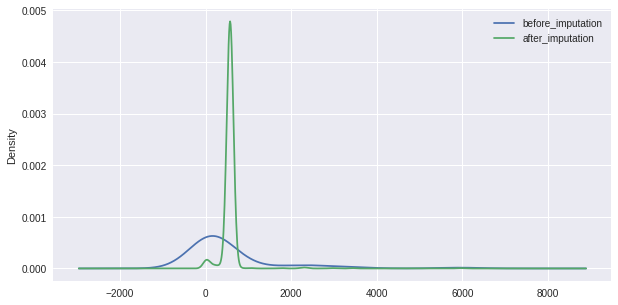

In [ ]:

#plt.subplot(1, 2, 1)
plt.figure();
output_1['1'].plot.kde()
#plt.subplot(1, 2, 2)
a_=imputed_knn_df['1'].plot.kde(figsize = [10, 5])
plt.legend(["before_imputation", "after_imputation"])

plt.show()

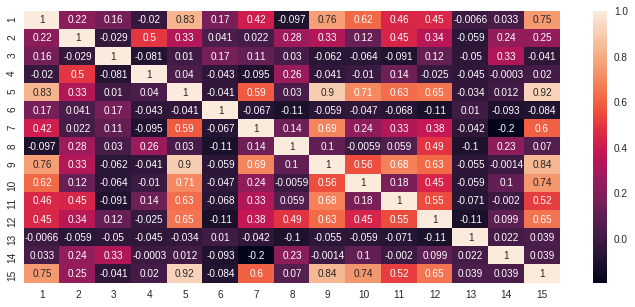

In [ ]:
plt.figure(figsize = [12, 5])
Var_Corr = imputed_knn_df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Y_cols, yticklabels=Y_cols, annot=True)

In [34]:
dataset_knn = dataset.join(imputed_knn_df, lsuffix='_caller', rsuffix='_other')

In [ ]:
#dataset_knn.info()

In [35]:
X_cols =   ['Temp_H',
            'Temp_avg',
            'Temp_L',
            'Dew_H',
            'Dew_avg',
            'Dew_L',
            'Humidity_H',
            'Humidity_avg',
            'Humidity_L',
            'Pressure_H',
            'Pressure_avg',
            'Pressure_L',
            'Visibility_H',
            'Visibility_avg',
            'Visibility_L',
            'Wind_H',
            'Wind_avg',
            'fog',
            'Month',
            'rain']

X = dataset_knn[X_cols].values

In [36]:
Y_cols = ['1',
          '2',
          '3',
          '4',
          '5',
          '6',
          '7',
          '8',
          '9',
          '10',
          '11',
          '12',
          '13',
          '14',
          '15']
y_tot_1 = dataset_knn[Y_cols].values

In [ ]:
p=pd.Series(output['5'])
p.shape
imputed_knn_df['5'].shape

(731,)

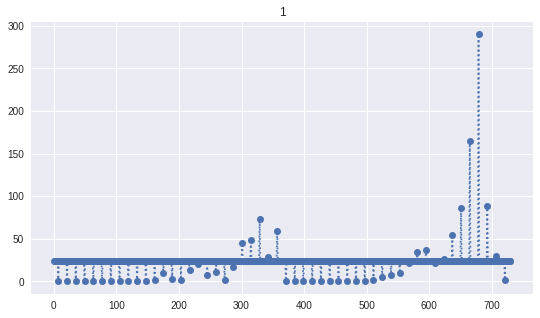

In [ ]:
imputed_knn_df['5'].plot(title='1',linestyle='dotted', marker='o',figsize=(9,5))

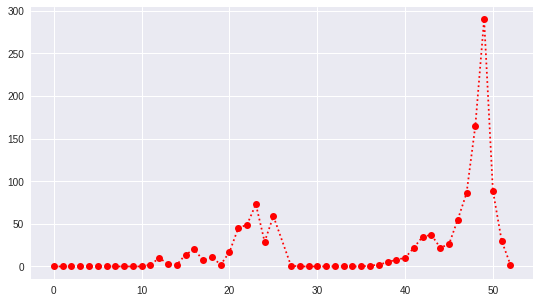

In [ ]:
p.plot(color='red', marker='o',linestyle='dotted',figsize=(9,5))

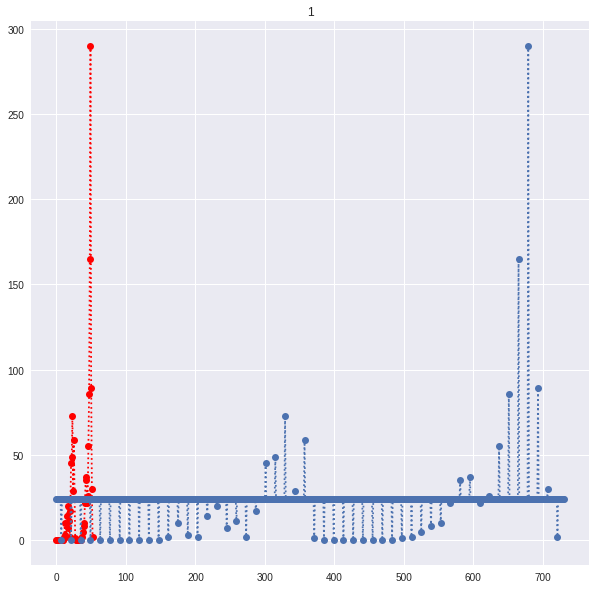

In [ ]:
p.plot(color='red', marker='o',linestyle='dotted',figsize=(10,10))
imputed_knn_df['5'].plot(title='1',linestyle='dotted', marker='o')
plt.show()

In [38]:
from math import sqrt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [39]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
y_scaled_1 = min_max_scaler.fit_transform(y_tot_1)

In [40]:
X_df = pd.DataFrame(x_scaled,columns=X_cols)

In [41]:
X_df.head(3)

,Temp_H,Temp_avg,Temp_L,Dew_H,Dew_avg,Dew_L,Humidity_H,Humidity_avg,Humidity_L,Pressure_H,Pressure_avg,Pressure_L,Visibility_H,Visibility_avg,Visibility_L,Wind_H,Wind_avg,fog,Month,rain
0,0.305556,0.259259,0.321429,0.461538,0.428571,0.470588,0.777778,0.644737,0.285714,0.348837,0.583333,0.653846,1.0,0.250,0.1,0.020942,0.216216,0.0,0.0,0.0
1,0.361111,0.333333,0.321429,0.384615,0.428571,0.500000,0.592593,0.565789,0.539683,0.418605,0.750000,0.769231,1.0,0.500,0.3,0.157068,0.351351,0.0,0.0,0.0
2,0.333333,0.333333,0.321429,0.500000,0.571429,0.705882,0.851852,0.802632,0.666667,0.465116,0.791667,0.807692,1.0,0.375,0.2,0.047120,0.216216,0.0,0.0,0.0


In [ ]:
#X_df.plot.hist(alpha = 0.5)

In [ ]:
y_df_1 = pd.DataFrame(y_scaled_1,columns=Y_cols)

In [ ]:
y_df_1.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.09654,0.220930,0.05,0.045872,0.082759,0.045455,0.2,0.0,0.115702,0.0,0.054054,0.0,0.038462,0.0,0.067928
1,0.09654,0.220930,0.05,0.045872,0.082759,0.045455,0.2,0.0,0.115702,0.0,0.054054,0.0,0.038462,0.0,0.067928
2,0.09654,0.232558,0.05,0.045872,0.082759,0.045455,0.2,0.0,0.115702,0.0,0.054054,0.0,0.038462,0.0,0.067928
3,0.09654,0.220930,0.05,0.045872,0.082759,0.045455,0.2,0.0,0.115702,0.0,0.054054,0.0,0.038462,0.0,0.067928
4,0.09654,0.232558,0.05,0.045872,0.082759,0.045455,0.2,0.0,0.115702,0.0,0.081081,0.0,0.038462,0.0,0.067928


In [42]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler() 
X_new = sc_x.fit_transform(X)
y_new_1 = sc_y.fit_transform(y_tot_1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new_1, test_size=0.2, random_state=130)

In [61]:

clf = MultiOutputRegressor(Ridge(random_state=123)).fit(X_train, y_train)
preds = clf.predict(X_test[:])


In [62]:
rmse_knn= mean_squared_error(y_test, preds,squared=False, multioutput='raw_values')*100

In [63]:
rmse_knn

array([ 15.24496226, 124.81760423,   8.64888979, 451.36813021,
        14.68353722,   9.36028329,  38.16161263, 162.01790747,
        14.32606887,   2.1696448 ,  26.35917054,  37.56075896,
         7.95630622,   8.97193156,  10.97705772])

In [64]:
clf_ = MultiOutputRegressor(LinearRegression()).fit(X_train, y_train)
preds = clf_.predict(X_test[:])

In [65]:
rmse_knn_= mean_squared_error(y_test, preds,squared=False, multioutput='raw_values')*100

In [66]:
rmse_knn_

array([ 15.31507356, 124.81580984,   8.82611849, 451.03741495,
        14.73602716,   9.90954154,  38.35999671, 162.93721082,
        14.41765002,   2.2442065 ,  26.79083069,  37.87322966,
         8.62942282,   9.0659704 ,  11.10551551])

In [ ]:
def plot_feature_importances_(i):
  FM = clf_.estimators_[i].coef_.mod()
  feature_importances = pd.DataFrame(FM,index=X_cols, columns= ['importance']).sort_values('importance',ascending= False)
  feature_importances.plot(kind = 'barh')
  plt.rcParams['figure.figsize'] = [5,5]
  plt.show()

In [50]:
imp_mean = SimpleImputer( strategy='median') #for median imputation replace 'mean' with 'median'
imp_mean.fit(output_1)
imputed_df = imp_mean.transform(output_1)
imputed_1_df = pd.DataFrame(imputed_df,columns=output_1.columns)

In [51]:
imputed_1_df = imputed_1_df.round(0)

In [ ]:
imputed_1_df.head()

In [ ]:
output_1['1'].plot(color='red', marker='o',linestyle='dotted')
imputed_1_df['1'].plot(title='1', marker='o')
  
plt.show()

In [ ]:
imputed_1_df.cumsum().plot()

In [52]:
dataset_median = dataset.join(imputed_1_df, lsuffix='_caller', rsuffix='_other')

In [53]:
y_tot_2 = dataset_median[Y_cols].values

In [54]:
y_new_2 = sc_y.fit_transform(y_tot_2)

In [55]:
y_scaled_2 = min_max_scaler.fit_transform(y_tot_2)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new_2, test_size=0.2, random_state=130)

In [68]:
clf_2 = MultiOutputRegressor(Ridge(random_state=123)).fit(X_train, y_train)
preds = clf_2.predict(X_test[:])

In [69]:
rmse_median= mean_squared_error(y_test, preds,squared=False, multioutput='raw_values')*100
rmse_median= np.sqrt(mean_squared_error(y_test,preds, multioutput='raw_values'))*100
#rrmse_median = np.sqrt(mean_squared_error(y_test, preds, multioutput='raw_values'))*100/np.mean(y_test)

In [70]:
rmse_median

array([ 31.14588111, 124.27847377,  18.47503002, 215.13440696,
        39.0507701 ,  20.14984574,  30.51022549, 127.28625514,
        37.62985685,  14.72971418,  52.61886084,  61.28683297,
        19.48713519,  29.95318273,  31.67748903])

In [ ]:
"""clf_2_ = MultiOutputRegressor(LinearRegression()).fit(X_train, y_train)
preds = clf_2.predict(X_test[:])"""

In [ ]:
#rmse_median_= mean_squared_error(y_test, preds,squared=False, multioutput='raw_values')*100

In [ ]:
#rmse_median_

In [ ]:
objective = "reg:linear"
seed = 100
n_estimators = 8
learning_rate = 0.3
gamma = 0.4
subsample = 0.9
colsample_bytree =0.5
reg_alpha = 0.9
reg_lambda = 0.9
silent = False
max_depth = 5
min_child_weight = 0
subsample = 0.1
rmse=[]
rrmse=[]
parameters = {}
parameters['objective'] = objective
parameters['seed'] = seed
parameters['n_estimators'] = n_estimators
parameters['learning_rate'] = learning_rate
parameters['gamma'] = gamma
parameters['colsample_bytree'] = colsample_bytree
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
parameters['silent'] = silent

X_train, X_test, y_train, y_test = train_test_split(X_new, y_scaled_1, test_size=0.2, random_state=130)
model = xgb.XGBRegressor(objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        silent = silent)
xg_reg_multioutputregressor = MultiOutputRegressor(model)
xg_reg_multioutputregressor.fit(X_train,y_train)
   
preds = xg_reg_multioutputregressor.predict(X_test[:])     
rmse_knn_xgb = mean_squared_error(y_test, preds,squared=False, multioutput='raw_values')

In [ ]:
FM = fit.estimators_[3].feature_importances_
feature_importances = pd.DataFrame(FM,index=X_cols, columns= ['importance']).sort_values('importance',ascending= False)
feature_importances

In [ ]:
def plot_feature_importances_(i):
  FM = xg_reg_multioutputregressor.estimators_[i].feature_importances_
  feature_importances = pd.DataFrame(FM,index=X_cols, columns= ['importance']).sort_values('importance',ascending= False)
  feature_importances.plot(kind = 'barh')
  plt.rcParams['figure.figsize'] = [5,5]
  plt.show()


In [ ]:
plot_feature_importances_(9)

In [ ]:
rmse_knn_xgb*100

In [ ]:
#data_dmatrix_2 = xgb.DMatrix(data=x_scaled,label=y_scaled_2)

In [ ]:
objective = "reg:linear"
seed = 100
n_estimators = 8
learning_rate = 0.3
gamma = 0.3
subsample = 0.1
colsample_bytree =0.5
reg_alpha = 0.9
reg_lambda = 0.9
silent = False
max_depth = 100
min_child_weight = 0
subsample = 0.9
rmse=[]
rrmse=[]
parameters = {}
parameters['objective'] = objective
parameters['seed'] = seed
parameters['n_estimators'] = n_estimators
parameters['learning_rate'] = learning_rate
parameters['gamma'] = gamma
parameters['colsample_bytree'] = colsample_bytree
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
parameters['silent'] = silent

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new_2, test_size=0.2, random_state=130)
xg_reg_multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        silent = silent)).fit(X_train,y_train)
   

  
preds = xg_reg_multioutputregressor.predict(X_test[:])     
rmse_median_xgb= mean_squared_error(y_test, preds,squared=False, multioutput='raw_values')
#rmse_median_xgb= np.sqrt(mean_squared_error(y_test,preds, multioutput='raw_values'))*100
#rrmse_median_xgb = np.sqrt(mean_squared_error(y_test, preds, multioutput='raw_values'))*100/np.mean(y_test)


In [ ]:
rmse_median_xgb*100

In [ ]:
"""cv_results = MultiOutputRegressor(xgb.cv(dtrain=data_dmatrix_2, params=parameters, nfold=400,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse",
                    as_pandas=False, seed=seed))
rmse =cv_results.estimator['test-rmse-mean']"""
#rrmse =(rmse/np.mean(y_test))*100

In [ ]:
#rmse

In [ ]:
#df.to_csv('/content/drive/My Drive/Colab Notebooks/PA_1/Guava_tree/clean_csv_file.csv')